In [1]:
from Modules.Tokenizer import tokenize, tokenizeSRT
from Modules import AnkiConnect as anki
from collections import Counter
from rich import print
import math
from jamdict import Jamdict

In [2]:
dictJP = Jamdict()
def sigmoid(x):
    return 1 / (1 + (math.exp(-x)))
def HeatMapPrint(list: list) -> None:
    string_to_print = ''
    median = float(list[len(list) // 2][1])
    for word, freq in list:
        normalized_freq = (float(freq) - median)
        green = sigmoid(normalized_freq)
        red = sigmoid(-normalized_freq+1)
        blue = sigmoid(-normalized_freq+5)
        info = dictJP.lookup(word)
        if info.names and not info.entries:
            string_to_print += f'[b][#ff3366]{word}:[#ff6699]{freq}[/], '
        else:
            string_to_print += f'[b][#{format(int(red * 255), "02x")}{format(int(green * 255), "02x")}{format(int(blue * 255), "02x")}]{word}:[#{format(int((red**0.4) * 255), "02x")}{format(int((green**0.2) * 255), "02x")}{format(int((blue**0.4) * 255), "02x")}]{freq}[/], '

    print(string_to_print)

#### Testing Sample
##### Sample of N2 読解
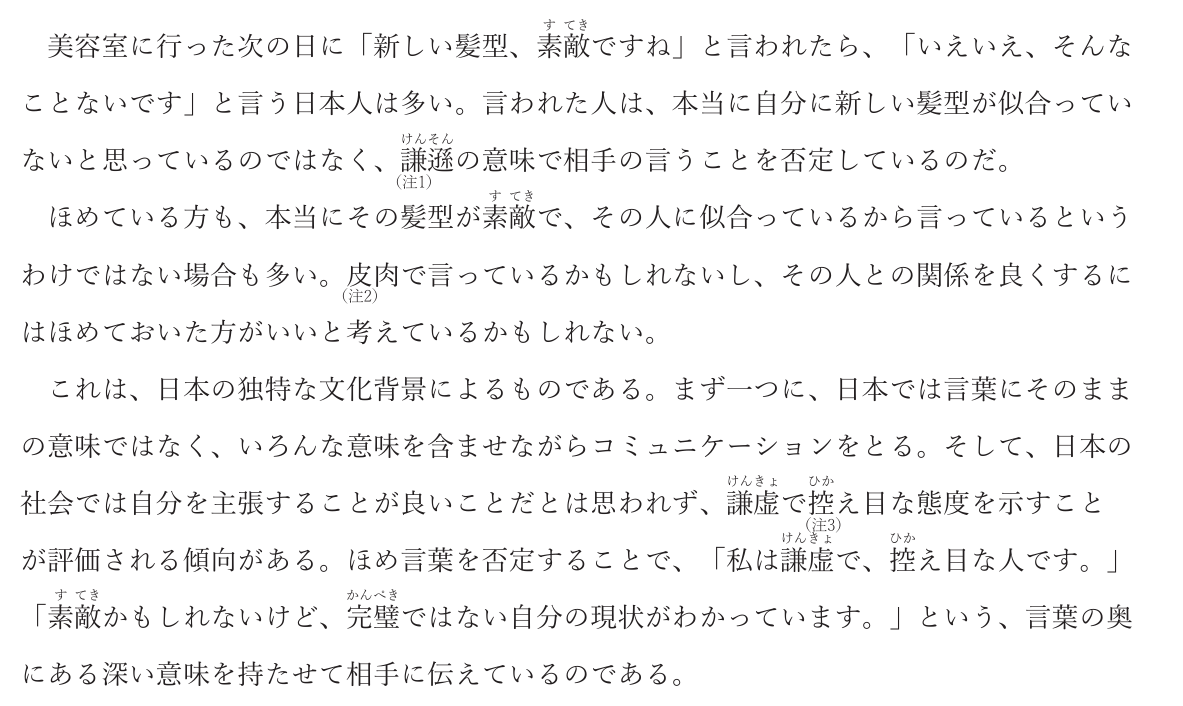

In [3]:
words = tokenize("すてき美容室に行った次の日に「新しい髪型、素敵ですね」と言われたら、「いえいえ、そんなことないです」と言う日本人は多い。言われた人は、本当に自分に新しい髪型が似合っていけんそんないと思っているのではなく、謙遜の意味で相手の言うことを否定しているのだ。(注いすてきほめている方も、本当にその髪型が素敵で、その人に似合っているから言っているというわけではない場合も多い。皮肉で言っているかもしれないし、その人との関係を良くするに(注 2 )はほめておいた方がいいと考えているかもしれない。これは、日本の独特な文化背景によるものである。まず ー っに、日本では言葉にそのままの意味ではなく、いろんな意味を含ませながらコミュニケ ー ションをとる。そして、日本のけんきょひか社会では自分を主張することが良いことだとは思われず、謙虚で控え目な態度を示すことひかが評価される傾向がある。ほめ言葉を否定することで、「私は謙虚で、控え目な人です。」すてきかんべき「素敵かもしれないけど、完璧ではない自分の現状がわかっています。」という、言葉の奥にある深い意味を持たせて相手に伝えているのである。")
freqWords = Counter(words).most_common()
# words = tokenizeSRT("./subtitles")
# freqWords = Counter(words).most_common()

In [4]:
HeatMapPrint(freqWords)

人:5, 言う:4, 日本:4, 意味:4, 髪型:3, 素敵:3, 自分:3, 新しい:2, 多い:2, 本当:2, 似る:2, 
相手:2, 否定:2, 方:2, 良い:2, 言葉:2, 謙虚:2, 控え目:2, 美容:1, 室:1, 次:1, 日:1, 謙遜:1, 
注ぐ:1, 場合:1, 皮肉:1, 関係:1, 注:1, 考える:1, 独特:1, 文化:1, 背景:1, 含む:1, 社会:1, 
主張:1, 思う:1, 態度:1, 示す:1, 評価:1, 傾向:1, ほめ言葉:1, 私:1, 完璧:1, 現状:1, 奥:1, 
深い:1, 持つ:1, 伝える:1, 

In [5]:
words = [word for word, _ in freqWords] 
results = anki.has(words)

important_words = [word for word, result in zip(words, results) if not result]
freq_dict = dict(freqWords)
important_words = [word for word, result in zip(words, results) if not result]
important_words_with_freq = [(word, freq_dict.get(word, 0)) for word in important_words]

HeatMapPrint(important_words_with_freq)

髪型:3, 謙虚:2, 控え目:2, 美容:1, 室:1, 謙遜:1, 注ぐ:1, 皮肉:1, 注:1, 独特:1, 背景:1, 主張:1,
傾向:1, ほめ言葉:1, 